# Question 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Titanic dataset into a pandas DataFrame
titanic_df = pd.read_csv("titanic.csv")

In [3]:
# Explore the first few rows of the dataset to understand its structure
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S


In [4]:
# Calculate and visualise the basic statistics (mean, median, etc) for the numeric columns
numeric_stats = titanic_df.describe()
numeric_stats

,PassengerId,Survived,Pclass,Age,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,6.000000,512.329200


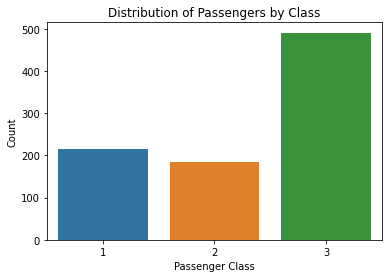

In [9]:
# Create a bar chart to show the distribution of passengers by class 
sns.countplot(data=titanic_df, x=titanic_df['Pclass'])
plt.title('Distribution of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show() 

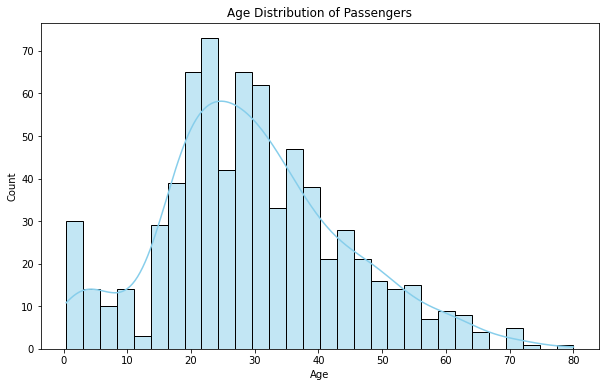

In [10]:
# Create a histogram to visualise the age distribution of passengers
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

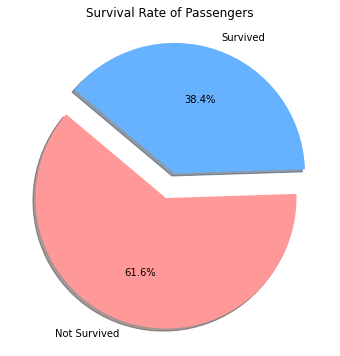

In [16]:
# Calculate and visualise the survival rate of passengers. Create a pie chart to represent this information
survival_counts = titanic_df['Survived'].value_counts()

# Plotting
labels = ['Not Survived', 'Survived']
colors = ['#ff9999','#66b2ff']
plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, explode=(0.1, 0.1))
plt.title('Survival Rate of Passengers')
plt.show()

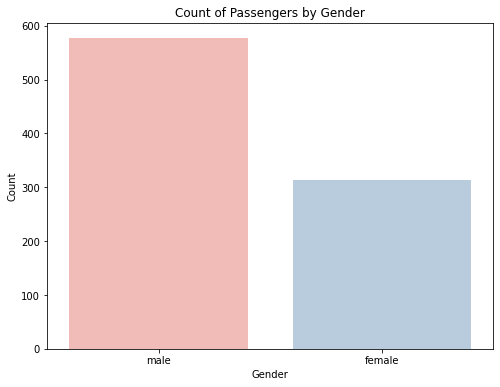

In [12]:
# Create a bar chart to show the count of passengers by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Sex', palette="Pastel1")
plt.title('Count of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

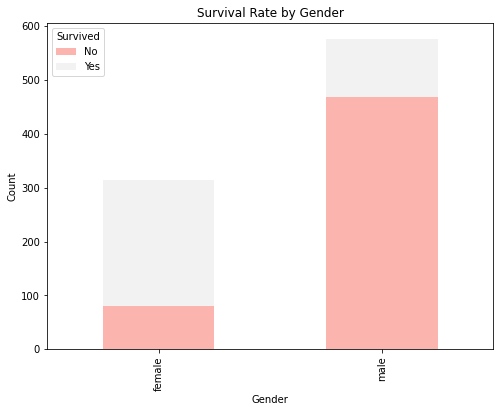

In [13]:
# Create a stacked bar chart to visualise the survival rate by gender. Explain any gender-based differences in survival
gender_survival = titanic_df.groupby(['Sex', 'Survived']).size().unstack()

# Plotting
gender_survival.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="Pastel1")
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

The stacked bar chart visualizes the survival rate by gender:
* A significant proportion of female passengers survived compared to their male counterparts.
* For male passengers, a large majority did not survive.

Historically, it's known that there was a "women and children first" policy for lifeboat boarding, which could explain the higher survival rate for females. This observation aligns with this policy, as female passengers had a much higher chance of survival compared to male passengers.

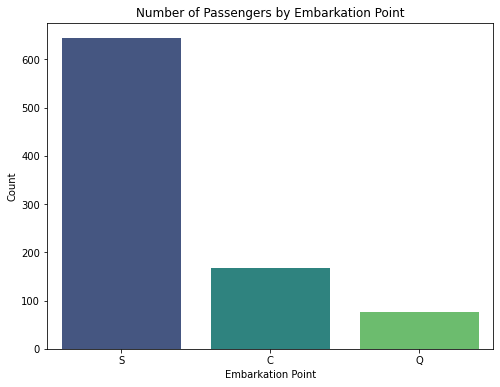

In [14]:
# Create a count plot (bar chart) to show the number of passengers who embarked from each location (S, C, Q)
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='Embarked', palette="viridis")
plt.title('Number of Passengers by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()

The bar chart showcases the number of passengers by their embarkation point:
* S (Southampton): The majority of passengers embarked from Southampton.
* C (Cherbourg): A significant number of passengers embarked from Cherbourg, but less than Southampton.
* Q (Queenstown): The fewest passengers embarked from Queenstown compared to the other two points.

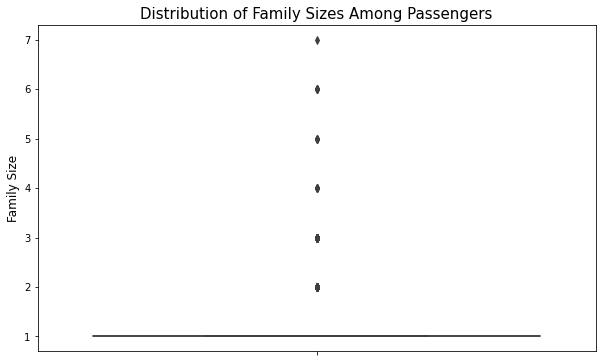

In [15]:
#  Create a box plot to visualise the distribution of family sizes among passengers
# Calculate family size by adding the 'Parch' (parents/children) column to itself (since each row represents one passenger)
titanic_df['FamilySize'] = titanic_df['Parch'] + 1

# Create a box plot for the distribution of family sizes
plt.figure(figsize=(10, 6))
sns.boxplot(y=titanic_df['FamilySize'], color='lightseagreen')
plt.title('Distribution of Family Sizes Among Passengers', fontsize=15)
plt.ylabel('Family Size', fontsize=12)
plt.show()

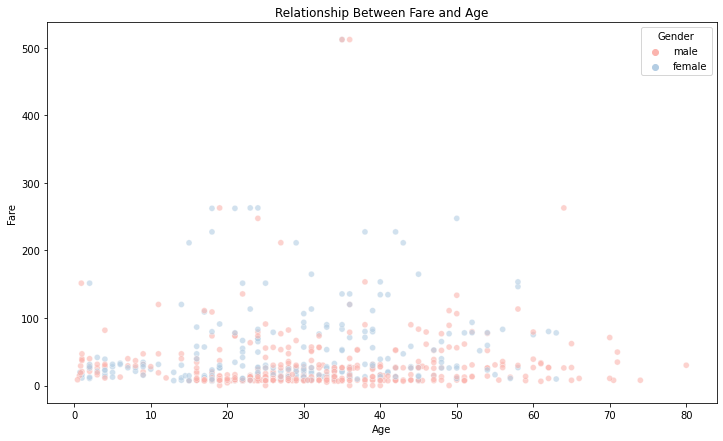

In [17]:
# Create a scatter plot to visualise the relationship between fare and age
# Scatter plot for the relationship between fare and age
plt.figure(figsize=(12, 7))
sns.scatterplot(x=titanic_df['Age'], y=titanic_df['Fare'], hue=titanic_df['Sex'], palette='Pastel1', alpha=0.6)
plt.title('Relationship Between Fare and Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Gender')
plt.show()

* There isn't a strong linear relationship between age and fare. This means that fare doesn't necessarily increase or decrease with age.
* Most passengers, regardless of age, paid lower fares, as indicated by the dense concentration of points near the bottom of the plot.
* There are some passengers (across various age groups) who paid significantly higher fares, as indicated by the points higher up on the y-axis.
* The hue differentiation based on gender shows that both males and females are spread across the age and fare spectrum.

# Q2 - Sentiment Analysis

## Data Loading

In [18]:
# Load the dataset
df = pd.read_csv("Corona_NLP.csv")

In [19]:
# Show the last 10 rows of the dataframe 
df.tail(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
44948,3789.0,48741,Pakistan,16-03-2020,You never eaten the pigs cat dog or food from ...,Neutral
44949,3790.0,48742,"California, USA",16-03-2020,@calebmealer @thebradfordfile @realDonaldTrump...,Extremely Positive
44950,3791.0,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive
44951,3792.0,48744,Washington D.C.,16-03-2020,"With Gov Hogan's announcement that all bars, r...",Extremely Negative
44952,3793.0,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative
44953,3794.0,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
44954,3795.0,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
44955,3796.0,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
44956,3797.0,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative
44957,3798.0,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to...,Extremely Positive


## Manipulation and Visualisations

In [20]:
#  Check if there are any duplicate rows. If there are any, remove the duplicates
# Check and remove duplicate rows
initial_rows = len(df)
df.drop_duplicates(inplace=True)
remaining_rows = len(df)

# Calculate number of duplicates removed
duplicates_removed = initial_rows - remaining_rows
duplicates_removed

1

In [21]:
# (a) In the Location column, find unique values and their corresponding frequencies (number of times they appear) 
# (b) Sort the values in descending order.
# (c) Using a bar chart, visualise your results for the top 20 locations
location_frequencies = df['Location'].value_counts()
location_frequencies.head(10)  # Display top 10 for preview

United States      603
London, England    568
London             565
New York, NY       429
Washington, DC     411
United Kingdom     355
Los Angeles, CA    314
India              283
UK                 246
USA                243
Name: Location, dtype: int64

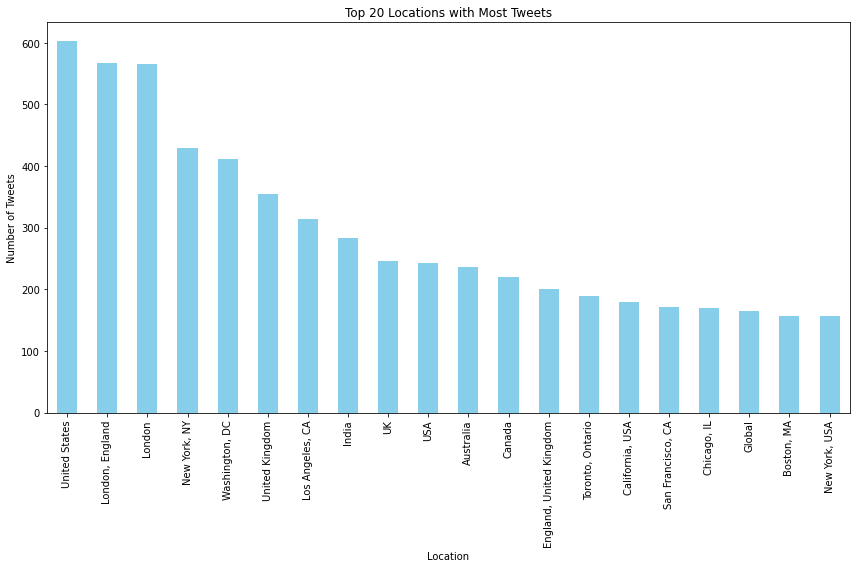

In [23]:
plt.figure(figsize=(12, 8))
location_frequencies.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Locations with Most Tweets')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

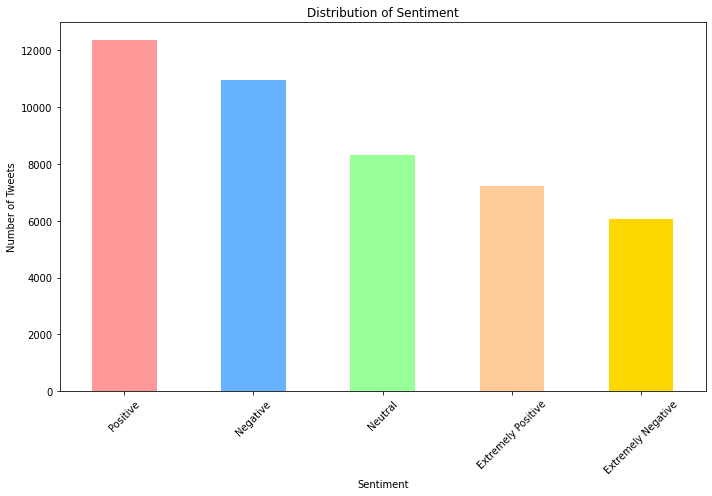

In [24]:
# You will see that Sentiment can take 5 values: "Extremely Negative", "Negative", "Neutral", "Positive", 
# "Extremely Positive". Using an appropriate color palette and an
# appropriate type of graph, visualise how Sentiment is distributed
# Get the sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts()

# Plot the sentiment distribution
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']
plt.figure(figsize=(10, 7))
sentiment_distribution.plot(kind='bar', color=colors)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Change the labels of part of the data, combining "Extremely Negative" and "Negative" into “Negative” and "Positive" and "Extremely Positive" into positive
# Combine the labels
df['Sentiment'] = df['Sentiment'].replace({"Extremely Negative": "Negative", "Extremely Positive": "Positive"})

# Display the updated distribution of sentiments
updated_sentiment_distribution = df['Sentiment'].value_counts()
updated_sentiment_distribution

Positive    19592
Negative    17031
Neutral      8330
Name: Sentiment, dtype: int64

## Cleaning

In [27]:
# check for null
df['OriginalTweet'].isnull().sum()

2

In [29]:
df['OriginalTweet'] = df['OriginalTweet'].fillna("")

In [30]:
df['OriginalTweet'].isnull().sum()

0

In [31]:
# Remove hyperlinks, hashtags and Replace \n and \r with an empty space
import re

def clean_text(tweet):
    # 1. Remove hyperlinks
    tweet = re.sub(r'http\S+', '', tweet)
    
    # 2. Remove hashtags
    tweet = re.sub(r'#\S+', '', tweet)
    
    # 3. Replace \n and \r with an empty space
    tweet = tweet.replace('\n', ' ').replace('\r', ' ')
    
    return tweet

In [32]:
# Apply the function to the 'OriginalTweet' column
df['Tweet'] = df['OriginalTweet'].apply(clean_text)

# Display the first few rows to verify the changes
df[['OriginalTweet', 'Tweet']].head()

,OriginalTweet,Tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the out..."


In [34]:
# Using TweetTokenizer in nltk.tokenize, perform tokenization.
# In the same function, remove stopwords and punctuation signs
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

# subpart 4 and 5
def tokenizing(tweet):
    #nltk.download()

    stopwords_english = stopwords.words('english')

    # 1 mark
    tokenizer =  TweetTokenizer() # create an instance of the toke
    new_tweet = tokenizer.tokenize(tweet) # tokenize the tweet
    
    clean_tweet = []

   # 1 mark
    for element in new_tweet:  # Going through every word in tokens list
        # our goal is to remove punctuation and stopwords
        # If the element is not a stopword or a punctuation sign, add it to clean_tweet
        if element.lower() not in stopwords_english and element not in string.punctuation:
            clean_tweet.append(element)

    


    return clean_tweet

In [35]:
df['Tweet'] = df['Tweet'].apply(tokenizing)

In [36]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,3799.0,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[@MeNyrbie, @Phil_Gahan, @Chrisitv]"
1,3800.0,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,"[advice, Talk, neighbours, family, exchange, p..."
2,3801.0,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,"[Coronavirus, Australia, Woolworths, give, eld..."
3,3802.0,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, ..., PLEASE, panic, ..."
4,3803.0,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,"[ready, go, supermarket, outbreak, I'm, parano..."


In [37]:
# Perform stemming using PorterStemmer in nltk.stem
def stemming(tweet):
    # Instantiate stemming class
    stemmer = PorterStemmer()  # create an instance of a Porter stem

    # Create an empty list to store the stems
    stemmed_tweets = []

    for word in tweet:
        stem_word = stemmer.stem(word)  # stemming word
        stemmed_tweets.append(stem_word)  # append to the list

    return stemmed_tweets

In [38]:
# Apply these functions to the dataset and visualise the first 5 rows
df['Tweet'] = df['Tweet'].apply(stemming)

# Visualizing the first 5 rows
df[['OriginalTweet', 'Tweet']].head()

,OriginalTweet,Tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,"[@menyrbi, @phil_gahan, @chrisitv]"
1,advice Talk to your neighbours family to excha...,"[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,"[coronaviru, australia, woolworth, give, elder..."
3,My food stock is not the only one which is emp...,"[food, stock, one, empti, ..., pleas, panic, e..."
4,"Me, ready to go at supermarket during the #COV...","[readi, go, supermarket, outbreak, i'm, parano..."


##  Model development

In [39]:
# Create a tf-idf vectorizer and fit the function
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Join the tokenized and stemmed tweets to a single string for each row
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join(x))

# Fit the vectorizer to the processed tweets
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tweet'])

tfidf_matrix.shape

(44957, 38366)

In [40]:
# Keeping only the columns Tweet and Sentiment, split your dataset into training (80%) and test (20%) sets.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df_subset = df[['Tweet', 'Sentiment']]
df_subset = df_subset.dropna(subset=['Sentiment'])
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_subset['Tweet'], df_subset['Sentiment'], 
                                                    test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((35962,), (8991,))

In [41]:
# Build a logistic regression model and fit the data. 

X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

# Instantiate and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_transformed, y_train)

# Predict the sentiment for the test data
y_pred = logreg.predict(X_test_transformed)

In [42]:
# What is the accuracy of the model?
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8035813591369146

In [43]:
# Generate a classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.81      0.82      0.82      3385
     Neutral       0.76      0.64      0.69      1682
    Positive       0.82      0.86      0.84      3924

    accuracy                           0.80      8991
   macro avg       0.79      0.77      0.78      8991
weighted avg       0.80      0.80      0.80      8991



## COMMENT
The model achieves an accuracy of 80% which is a very good performance given the complexity of the sentiment analysis. Overall, he model demonstrates a robust performance, especially in distinguishing positive and negative sentiments. However, there's potential for improvement in classifying neutral tweets.

# Question 3

In [44]:
q3_data = pd.read_csv('q3_data.csv')
q3_data.head()

,x1,x2
0,27.440675,58.350216
1,35.759468,70.721069
2,30.138169,59.607830
3,27.244159,59.877037
4,21.182740,36.731351


In [45]:
# What is the mean, mode, median and interquartile range for x1 and x2?
q3_data.agg({'x1':['mean','median'], 'x2': ['mean','median']}).round(2)

,x1,x2
mean,49.79,-50.17
median,50.26,-50.36


In [46]:
# create a function to calculate iqr
def pct(column):
    return column.quantile(0.75) - column.quantile(0.25)

In [47]:
print(f'x1_mode: {q3_data.x1.mode()[0].round(2)}, x2_mode: {q3_data.x2.mode()[0].round(2)},\
 x1_iqr: {q3_data.x1.agg(pct).round(2)}, x2_iqr: {q3_data.x2.agg(pct).round(2)}')

x1_mode: 0.23, x2_mode: -210.09, x1_iqr: 45.91, x2_iqr: 201.34


In [48]:
# What is the correlation coefficient between x1 and x2?
# Calculate the correlation coefficient between x1 and x2
correlation_coefficient = q3_data['x1'].corr(q3_data['x2'])

correlation_coefficient

-0.8318445482811823

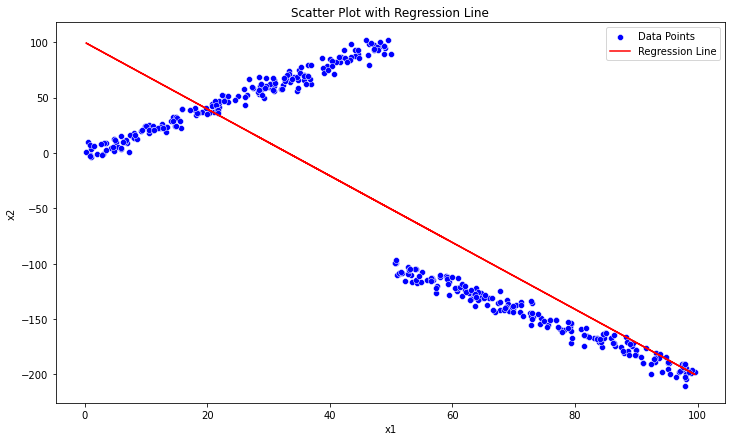

In [50]:
# Fit a regression line and visualise the data points
# Reshape data and fit a regression line

from sklearn.linear_model import LinearRegression
X = q3_data['x1'].values.reshape(-1, 1)
y = q3_data['x2'].values
regression_model = LinearRegression().fit(X, y)

# Predict values for the regression line
predicted_y = regression_model.predict(X)

# Visualize the data points and regression line
plt.figure(figsize=(12, 7))
sns.scatterplot(x=q3_data['x1'], y=q3_data['x2'], color='blue', label='Data Points')
plt.plot(q3_data['x1'], predicted_y, color='red', label='Regression Line')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

# COMMENTS
The calculated correlation coefficient of approximately −0.8318 indicates a strong negative linear relationship between x1 and x2. The regression line in the scatter plot confirms thios negatiove relationship as the line has a clear downwar inclined slope. With regards to the distribution of the data points, they lie mostly around the regression line, reinforcing the correlation's indication of a strong relationship. Though some outliers exist, the majority of the data points support this negative correlation.